In [2]:
import numpy as np
import matplotlib.pyplot as plt

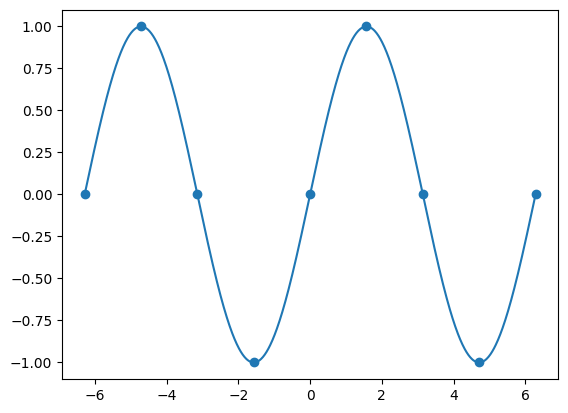

In [15]:
degree = 5
samples = 8 + 1

x = np.linspace(-2*np.pi, 2*np.pi, samples)
y = np.sin(x)

smoothed_x = np.linspace(-2*np.pi, 2*np.pi, 1000)
smoothed_y = np.sin(smoothed_x)

plt.plot(smoothed_x, smoothed_y)
plt.scatter(x, y)
plt.show()